# Global Variables

In [1]:
import os

rootPath = "/Users/lince/Desktop/WORK/98_Startup/01_YTClip"
videoPath = os.path.join(rootPath, "01_VideoRes")
codePath = os.path.join(rootPath, "02_Code")

# Video Crawling (Automate This Part After Finding Stable Source)

In [2]:
import cv2

videoName = "01.mp4"
videoFilePath = os.path.join(videoPath, videoName)
video = cv2.VideoCapture(videoFilePath);

# Video to Processed Images

## Remove Black Boundry

In [3]:
from PIL import Image
import numpy

def isCrust(pix):
    return sum(pix) < 5

def hCheck(img, y, step = 50):
    count = 0
    width = img.size[0]
    for x in range(0, width, step):
        if isCrust(img.getpixel((x, y))):
            count += 1
        if count > width / step / 2:
            return True
    return False
 
def vCheck(img, x, step = 50):
    count = 0
    height = img.size[1]
    for y in range(0, height, step):
        if isCrust(img.getpixel((x, y))):
            count += 1
        if count > height / step / 2:
            return True
    return False
 
def boundaryFinder(img,crust_side,core_side,checker):
    if not checker(img,crust_side):
        return crust_side
    if checker(img,core_side):
        return core_side
 
    mid = (crust_side + core_side) / 2
    while  mid != core_side and mid != crust_side:
        if checker(img,mid):
            crust_side = mid
        else:
            core_side = mid
        mid = (crust_side + core_side) / 2
    return core_side
    pass
 
def removeBlackBoundry(frame):
    
    img = Image.fromarray(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))  
    width, height = img.size
 
    left = boundaryFinder(img, 0, width/2, vCheck)
    right = boundaryFinder(img, width-1, width/2, vCheck)
    top = boundaryFinder(img, 0, height/2, hCheck)
    bottom = boundaryFinder(img, height-1, width/2, hCheck)
 
    rect = (left,top,right,bottom)
    print(rect)
    region = cv2.cvtColor(numpy.asarray(img.crop(rect)),cv2.COLOR_RGB2BGR) 
    return region

## Video Save as Clean Images

In [3]:
framepath = os.path.join(videoPath, videoName.split(".")[0])

In [4]:
def video_to_image_with_process(video):
    fps = video.get(cv2.CAP_PROP_FPS)
    print("{0}: Frames per second using video.get(cv2.CAP_PROP_FPS) : {1}".format(videoName, fps))
    fps = int(round(fps))

    os.makedirs(framepath, exist_ok=True)
    c = 1
    if video.isOpened():
        rval, frame = video.read()
    else:
        rval = False

    while rval:
        rval, frame = video.read()
        if (c % fps == 0):
            frame = removeBlackBoundry(frame)
            seconds = int(c/fps)
            minu = int(seconds / 60)
            secd = seconds - minu * 60
            imgSavePath = os.path.join(framepath, ("{0}_{1}.jpg").format(minu,secd))
            cv2.imwrite(imgSavePath ,frame)
        c = c + 1
        cv2.waitKey(1)
    video.release()

In [14]:
video_to_image_with_process(video)

01.mp4: Frames per second using video.get(cv2.CAP_PROP_FPS) : 30.0
(0, 0, 1279, 719)
(0, 0, 1279, 719)
(0, 0, 1279, 719)
(0, 0, 1279, 719)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9

(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 684.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.9999999999999)
(0, 39.0, 1279, 685.

(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 679.9999999999999)
(0, 46.0, 1266.9999999999998, 680.9999999999999)
(0, 46.0, 1266.9999999999998, 680.9999999999999)
(0, 46.0, 1266.99999

(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 687.9999999999999)
(0, 39.0, 1279, 686.9999999999999)
(0, 39.0, 1279, 686.

## Load Original Processed Images

In [4]:
framepath

'/Users/lince/Desktop/WORK/98_Startup/01_YTClip/01_VideoRes/01'

In [5]:
from glob import glob

oriImgs = []
imageNames = os.listdir(framepath)
imageNames = sorted(imageNames, key=lambda x:(int(x.split(".")[0].split("_")[0]), int(x.split(".")[0].split("_")[1])))
for imageName in imageNames:
    img = cv2.imread(os.path.join(framepath, imageName))
    oriImgs.append(img)

# Image Banner Prediction

## load model

In [6]:
import datetime
from glob import glob
import random
import sys
import itertools

import matplotlib.pyplot as plt
import skimage.io                                     #Used for imshow function
import skimage.transform                              #Used for resize function
from skimage.morphology import label                  #Used for Run-Length-Encoding RLE to create final submission

import numpy as np
import pandas as pd

import keras
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Conv2DTranspose
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.models import load_model, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.merge import add, concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, ReduceLROnPlateau
from keras.utils import multi_gpu_model, plot_model, to_categorical
from keras import backend as K
from keras import optimizers

import tensorflow as tf
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
print('Skimage      :', skimage.__version__)
print('Scikit-learn :', sklearn.__version__)
print('Keras        :', keras.__version__)
print('Tensorflow   :', tf.__version__)

Using TensorFlow backend.


Python       : 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:14:23) 
Numpy        : 1.14.5
Skimage      : 0.14.0
Scikit-learn : 0.19.1
Keras        : 2.1.6
Tensorflow   : 1.8.0


In [7]:
modelPath = os.path.join(os.path.join(codePath, "01_Scripts"), "highlight_model.h5")

In [8]:
model = load_model(modelPath)

## Banner Preprocess

In [9]:
def crop_img_banner(img, width=0.5, height=0.4):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * width, img.shape[0] * height
    left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
    top_y, bottom_y = 0, 0 + height_scaled
    img_cropped = img[int(top_y):int(bottom_y), int(left_x):int(right_x)]
    return img_cropped

In [10]:
img_height, img_width = (128,128)
statusTextDict = {0: 'double_kill', 1: 'first_blood', 2: 'none', 3: 'triple_kill', 4: 'wipe'}
banners = []

for img in oriImgs:
    img = crop_img_banner(img, width=0.5, height=0.4)
    img = cv2.resize(img, (img_height, img_width))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    banners.append(img)
banners = np.array(banners)
banners = banners/255

In [11]:
banners.shape

(896, 128, 128, 3)

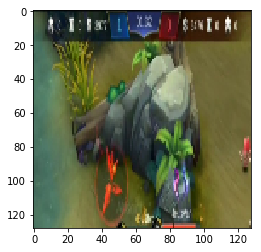

In [12]:
plt.imshow(banners[100])

In [13]:
import time

startTime = time.time()
statuses = model.predict(banners).argmax(axis=1)
endTime = time.time()
print("Prediction time: {0} seconds".format(endTime - startTime))

Prediction time: 12.280710220336914 seconds


In [14]:
statuses.shape

(896,)

In [15]:
unique, counts = np.unique(statuses, return_counts=True)
print("status:",dict(zip(unique, counts)))

status: {0: 5, 2: 889, 4: 2}


# Image Score Recognize 

In [16]:
sys.path.append("/Users/lince/Desktop/WORK/98_Startup/01_YTClip/02_Code/01_Scripts/SVHN-deep-digit-detector")

In [17]:
import digit_detector.region_proposal as rp
import digit_detector.show as show
import digit_detector.detect as detector
import digit_detector.file_io as file_io
import digit_detector.preprocess as preproc
import digit_detector.classify as cls

ocrPath = os.path.join(os.path.join(codePath, "01_Scripts"), "SVHN-deep-digit-detector")
detect_model = os.path.join(ocrPath, "detector_model.hdf5")
recognize_model = os.path.join(ocrPath, "recognize_model.hdf5")

mean_value_for_detector = 107.524
mean_value_for_recognizer = 112.833

model_input_shape = (32,32,1)

In [18]:
preproc_for_detector = preproc.GrayImgPreprocessor(mean_value_for_detector)
preproc_for_recognizer = preproc.GrayImgPreprocessor(mean_value_for_recognizer)

char_detector = cls.CnnClassifier(detect_model, preproc_for_detector, model_input_shape)
char_recognizer = cls.CnnClassifier(recognize_model, preproc_for_recognizer, model_input_shape)

digit_spotter = detector.DigitSpotter(char_detector, char_recognizer, rp.MserRegionProposer())

/anaconda3/envs/py3/lib/python3.6/site-packages/keras/engine/topology.py:1271: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="convolution2d_1", activity_regularizer=None, trainable=True, input_dtype="float32", batch_input_shape=[None, 32,..., activation="linear", kernel_size=(3, 3), filters=32, strides=[1, 1], padding="valid", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=None, bias_constraint=None, use_bias=True)`
  return cls(**config)
/anaconda3/envs/py3/lib/python3.6/site-packages/keras/engine/topology.py:1271: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(name="convolution2d_2", activity_regularizer=None, trainable=True, activation="linear", kernel_size=(3, 3), filters=32, strides=[1, 1], padding="valid", data_format="channels_last", kernel_initializer="glorot_uniform", kernel_regularizer=None, bias_regularizer=None, kernel_constraint=None, bias_cons

In [44]:
def grp_result(result, sort_pos, threshold=30):
    temp = [result[0]]
    myDict = {}
    j = 0
    for i in range(1,len(sort_pos)):
        if sort_pos[i]-sort_pos[i-1]>=threshold:
            myDict[j] = temp
            temp = [result[i]]
            j+=1
        else:
            temp.append(result[i])
        if i==(len(sort_pos)-1):
            myDict[j] = temp
    return myDict

def get_results(bbs, probs, y_pred):
    position = np.take(bbs,[2],axis=1).flatten()
    sort_index = np.argsort(position)
    result = np.zeros(len(position)).astype(int)
    for i,item in enumerate(sort_index):
        result[i] = y_pred[item]
    sort_pos = np.sort(position)
    result = grp_result(result,sort_pos)
#     return result
    return clean_result(result)

def clean_result(resultDict):
    if len(resultDict) == 3 and len(resultDict[1]) == 4:
        return resultDict
    if len(resultDict) > 4:
        for i in range (4, len(resultDict)):
            resultDict.pop(i, None)
    if len(resultDict) == 4 and len(resultDict[1]) >= 4:
        resultDict.pop(3, None)
    if len(resultDict) == 4 and len(resultDict[1]) == 2 and len(resultDict[2]) == 2:
        resultDict[1] = resultDict[1] + resultDict[2]
        resultDict[2] = resultDict[3]
        resultDict.pop(3, None)
    if len(resultDict) == 3 and len(resultDict[1]) == 5:
        resultDict[1].pop(2)
    return resultDict

In [45]:
scores = []
scoreBanner = []
startTime = time.time()
for img in oriImgs:
    width = img.shape[1]
    height = img.shape[0]
    x, y, w, h = int(width/2)-int(width/13), 0, int(width/6), int(height/18)
    patch = img[y:y+h, x:x+w]
    scoreBanner.append(patch)
    patch = cv2.resize(patch, (400, 70))

    bbs, probs, y_pred = digit_spotter.single_run(patch, threshold=0.5, do_nms=True, nms_threshold=0.1, show_result=False)
    if len(bbs) == 0:
        result = None
    else:
        result = get_results(bbs, probs, y_pred)
    scores.append(result)
endTime = time.time()
print("Prediction time: {0} seconds".format(endTime - startTime))

Prediction time: 165.88729977607727 seconds


In [46]:
for i in range(0, len(scores)):
    print(i, scores[i])

0 None
1 None
2 None
3 None
4 {0: [2], 1: [5], 2: [3], 3: [7]}
5 {0: [2], 1: [1], 2: [5], 3: [3]}
6 {0: [2], 1: [1], 2: [5], 3: [3]}
7 None
8 None
9 None
10 {0: [0], 1: [0, 0, 0, 3], 2: [0]}
11 {0: [0], 1: [0, 0, 0, 4], 2: [0]}
12 {0: [0], 1: [0, 0, 0, 5], 2: [0]}
13 {0: [0], 1: [0, 0, 0, 6], 2: [0]}
14 {0: [0], 1: [0, 0, 0, 7], 2: [0]}
15 {0: [0], 1: [0, 0, 0, 8], 2: [0]}
16 {0: [0], 1: [0, 0, 0, 9], 2: [0]}
17 {0: [0], 1: [0, 0, 1, 0], 2: [0]}
18 {0: [0], 1: [0, 0, 1, 1], 2: [0]}
19 {0: [0], 1: [0, 0, 1, 2], 2: [0]}
20 {0: [0], 1: [0, 0, 1, 3], 2: [0]}
21 {0: [0], 1: [0, 0, 1, 3], 2: [0]}
22 {0: [0], 1: [0, 0, 1, 4], 2: [0]}
23 {0: [0], 1: [0, 0, 1, 6], 2: [0]}
24 {0: [0], 1: [0, 0, 1, 7], 2: [0]}
25 {0: [0], 1: [0, 0, 1, 8], 2: [0]}
26 {0: [0], 1: [0, 0, 1, 9], 2: [0]}
27 {0: [0], 1: [0, 0, 2, 0], 2: [0]}
28 {0: [0], 1: [0, 0, 2, 1], 2: [0]}
29 {0: [0], 1: [0, 0, 2, 2], 2: [0]}
30 {0: [0], 1: [0, 0, 2, 3], 2: [0]}
31 {0: [0], 1: [0, 0, 2, 4], 2: [0]}
32 {0: [0], 1: [0, 0, 2, 5], 2: 

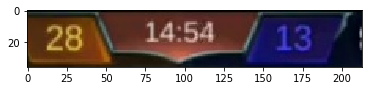

In [47]:
plt.imshow(scoreBanner[838])

# Image Info Builder

In [43]:
# exp = {0: [0], 1: [0, 0], 2: [1, 3], 3: [0]} # done
# exp = {0: [1], 1: [0, 1, 8, 3, 9], 2: [0]} # done
# exp = {0: [2, 8], 1: [1, 4], 2: [5, 0], 3: [1, 2], 4: [2]} # done
exp = {0: [3, 2], 1: [1, 5, 2, 2], 2: [1, 3], 3: [2]} # done

def clean_result(resultDict):
    if len(resultDict) == 3 and len(resultDict[1]) == 4:
        return resultDict
    if len(resultDict) > 4:
        for i in range (4, len(resultDict)):
            resultDict.pop(i, None)
    if len(resultDict) == 4 and len(resultDict[1]) >= 4:
        resultDict.pop(3, None)
    if len(resultDict) == 4 and len(resultDict[1]) == 2 and len(resultDict[2]) == 2:
        resultDict[1] = resultDict[1] + resultDict[2]
        resultDict[2] = resultDict[3]
        resultDict.pop(3, None)
    if len(resultDict) == 3 and len(resultDict[1]) == 5:
        resultDict[1].pop(2)
    return resultDict

print(clean_result(exp))

{0: [3, 2], 1: [1, 5, 2, 2], 2: [1, 3]}


# Time Period Builder

# Video Clipper